<a href="https://colab.research.google.com/github/AnanditaRai/ana/blob/main/Ai_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque

In [ ]:
# To keep track of the blocks of the maze
class Grid_Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Each block will have its own position and cost of steps taken
class Node:
    def __init__(self, pos: Grid_Position, cost):
        self.pos = pos
        self.cost = cost


In [ ]:
#BFS
def bfs(Grid, dest: Grid_Position, start: Grid_Position):
    adj_cell_x = [-1, 0, 0, 1]
    adj_cell_y = [0, -1, 1, 0]
    m, n = len(Grid), len(Grid[0])
    visited_blocks = [[False for _ in range(n)] for _ in range(m)]
    visited_blocks[start.x][start.y] = True
    queue = deque()
    queue.append(Node(start, 0))
    cost = 0

    while queue:
        current_block = queue.popleft()
        current_pos = current_block.pos

        # Visualize current step
        visualize_maze(Grid, current_pos)

        if current_pos.x == dest.x and current_pos.y == dest.y:
            print("Algorithm used = BFS")
            print("Path found!!")
            print("Total nodes visited = ", cost)
            return current_block.cost

        cost += 1
        for i in range(4):
            x_pos = current_pos.x + adj_cell_x[i]
            y_pos = current_pos.y + adj_cell_y[i]
            if 0 <= x_pos < m and 0 <= y_pos < n and not visited_blocks[x_pos][y_pos]:
                if Grid[x_pos][y_pos] == 1:
                    visited_blocks[x_pos][y_pos] = True
                    queue.append(Node(Grid_Position(x_pos, y_pos), current_block.cost + 1))

    return -1

In [ ]:
# DFS
def dfs(Grid, dest: Grid_Position, start: Grid_Position):
    adj_cell_x = [1, 0, 0, -1]
    adj_cell_y = [0, 1, -1, 0]
    m, n = len(Grid), len(Grid[0])
    visited_blocks = [[False for _ in range(n)] for _ in range(m)]
    visited_blocks[start.x][start.y] = True
    stack = deque()
    stack.append(Node(start, 0))
    cost = 0

    while stack:
        current_block = stack.pop()
        current_pos = current_block.pos

        # Visualize current step
        visualize_maze(Grid, current_pos)

        if current_pos.x == dest.x and current_pos.y == dest.y:
            print("Algorithm used = DFS")
            print("Path found!!")
            print("Total nodes visited = ", cost)
            return current_block.cost

        cost += 1
        for i in range(4):
            x_pos = current_pos.x + adj_cell_x[i]
            y_pos = current_pos.y + adj_cell_y[i]
            if 0 <= x_pos < m and 0 <= y_pos < n and not visited_blocks[x_pos][y_pos]:
                if Grid[x_pos][y_pos] == 1:
                    visited_blocks[x_pos][y_pos] = True
                    stack.append(Node(Grid_Position(x_pos, y_pos), current_block.cost + 1))

    return -1

In [ ]:

def visualize_maze(Grid, current_pos):
    maze = np.array(Grid)
    plt.imshow(maze, cmap="binary")
    plt.scatter(current_pos.y, current_pos.x, color="red")  # Current position
    plt.pause(0.1)
    plt.clf()

'''# Random Maze Generator
def generate_maze(rows, cols):
    maze = [[random.choice([0, 1]) for _ in range(cols)] for _ in range(rows)]
    maze[0][0] = maze[rows-1][cols-1] = 1  # Ensure start and end are open
    return maze
    '''


#Random maze generator with guarenteed paths
def generate_maze(rows, cols):
    # Create a grid with all walls (0s)
    maze = [[0 for _ in range(cols)] for _ in range(rows)]

    # Start with a grid of walls and carve out paths using Prim's algorithm
    start_x, start_y = 0, 0
    maze[start_x][start_y] = 1  # Mark the start position as a path

    # List of walls adjacent to paths
    walls = [(start_x + dx, start_y + dy) for dx, dy in [(0, 1), (1, 0)] if 0 <= start_x + dx < rows and 0 <= start_y + dy < cols]

    while walls:
        # Randomly select a wall
        wall = random.choice(walls)
        walls.remove(wall)

        wx, wy = wall
        # Skip if this wall is already part of the maze
        if maze[wx][wy] == 1:
            continue

        # Check neighbors
        neighbors = [(wx + dx, wy + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)] if 0 <= wx + dx < rows and 0 <= wy + dy < cols]
        path_neighbors = [n for n in neighbors if maze[n[0]][n[1]] == 1]

        # If exactly one neighbor is a path, turn this wall into a path
        if len(path_neighbors) == 1:
            maze[wx][wy] = 1
            # Add neighboring walls to the list
            for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                nx, ny = wx + dx, wy + dy
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                    walls.append((nx, ny))

    # Ensure the destination is open
    maze[rows - 1][cols - 1] = 1
    return maze
    '''

In [ ]:
# Main Function with Interactive Options
def main():
    rows, cols = 12, 12
    maze = generate_maze(rows, cols)

    while True:
        print("\nOptions:")
        print("1. Solve using BFS")
        print("2. Solve using DFS")
        print("3. Regenerate Maze")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            print("Running BFS...")
            visualize_maze(maze, Grid_Position(0, 0))
            steps = bfs(maze, Grid_Position(rows-1, cols-1), Grid_Position(0, 0))
            print("Shortest path steps = ", steps if steps != -1 else "Path does not exist")
        elif choice == "2":
            print("Running DFS...")
            visualize_maze(maze, Grid_Position(0, 0))
            steps = dfs(maze, Grid_Position(rows-1, cols-1), Grid_Position(0, 0))
            print("Steps with backtracking = ", steps if steps != -1 else "Path does not exist")
        elif choice == "3":
            maze = generate_maze(rows, cols)
            print("Maze regenerated!")
        elif choice == "4":
            print("Exiting...")
            break
        else:
            print("Invalid choice! Try again.")


Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Running BFS...


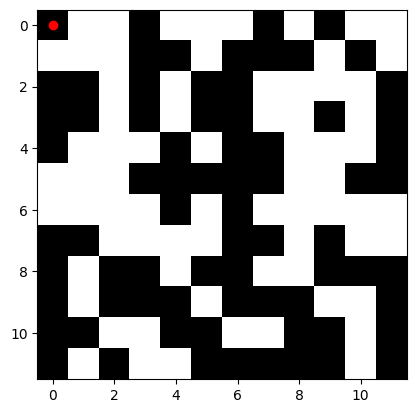

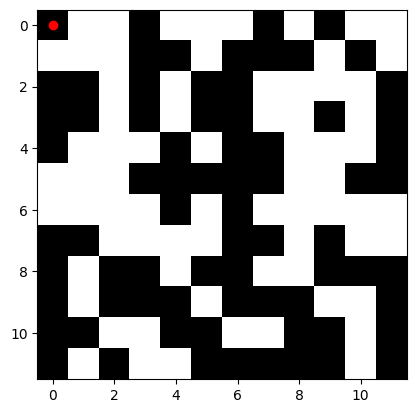

Shortest path steps =  Path does not exist

Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Running BFS...


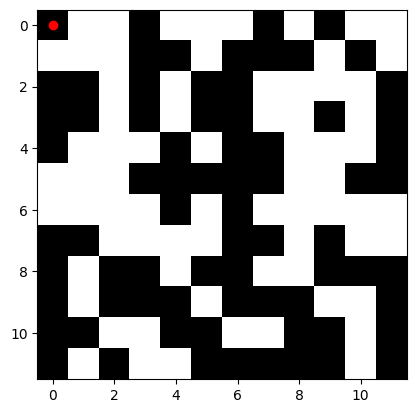

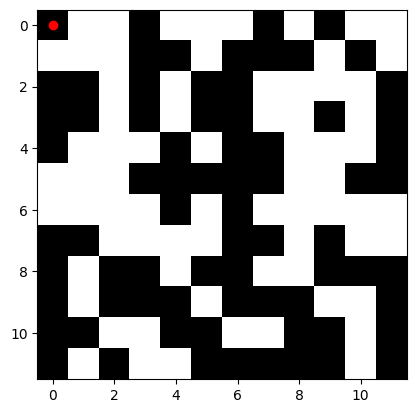

Shortest path steps =  Path does not exist

Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Running BFS...


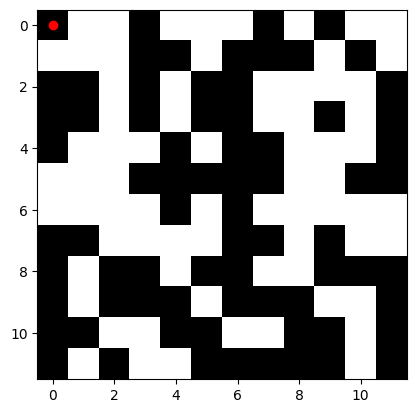

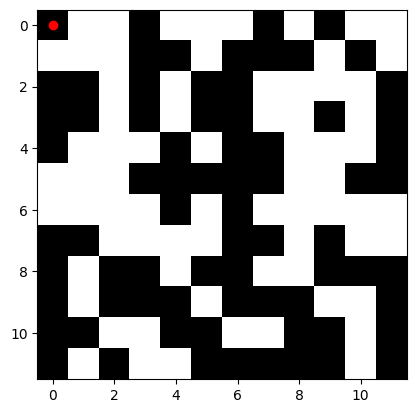

Shortest path steps =  Path does not exist

Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit


In [ ]:
if __name__ == '__main__':
    main()